### 생선의 길이를 사용하여 무게를 예측

In [2]:
import numpy as np

In [3]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

In [4]:
# 데이터 시각화
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

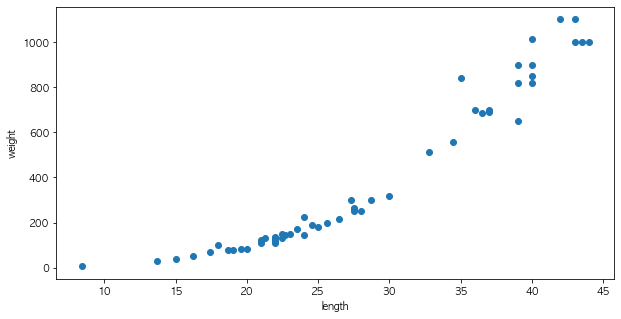

In [6]:
plt.figure(figsize=(10,5))

plt.scatter(
    fish_length, # Feature
    fish_weight, # Target
)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [8]:
fish_length / fish_length.max()

array([0.19090909, 0.31136364, 0.34090909, 0.36818182, 0.39545455,
       0.40909091, 0.425     , 0.43181818, 0.44545455, 0.45454545,
       0.47727273, 0.47727273, 0.47727273, 0.48409091, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.51136364,
       0.51136364, 0.51590909, 0.52272727, 0.53409091, 0.54545455,
       0.54545455, 0.55909091, 0.56818182, 0.58181818, 0.60227273,
       0.62045455, 0.625     , 0.625     , 0.625     , 0.63636364,
       0.65227273, 0.68181818, 0.74545455, 0.78409091, 0.79545455,
       0.82954545, 0.81818182, 0.84090909, 0.84090909, 0.88636364,
       0.88636364, 0.88636364, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.95454545, 0.97727273, 0.97727273, 0.98863636,
       1.        ])

In [9]:
fish_weight / fish_weight.max()

array([0.00536364, 0.02909091, 0.03636364, 0.04681818, 0.06363636,
       0.09090909, 0.07090909, 0.07272727, 0.07727273, 0.07727273,
       0.1       , 0.10454545, 0.11363636, 0.11818182, 0.10909091,
       0.10909091, 0.11818182, 0.12272727, 0.1       , 0.11818182,
       0.13636364, 0.13181818, 0.13636364, 0.15454545, 0.20454545,
       0.13181818, 0.17090909, 0.16363636, 0.17909091, 0.19818182,
       0.27272727, 0.23636364, 0.24090909, 0.22727273, 0.22727273,
       0.27272727, 0.29090909, 0.46727273, 0.50545455, 0.76363636,
       0.62272727, 0.63636364, 0.63636364, 0.62727273, 0.81818182,
       0.59090909, 0.74545455, 0.77272727, 0.81818182, 0.92272727,
       0.74545455, 1.        , 0.90909091, 1.        , 0.90909091,
       0.90909091])

### TrainSet, TestSet 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_label, test_label = train_test_split(fish_length, fish_weight, random_state=42)

> KNN 분류에서 사용되었던 stratify는 회귀에서 사용하면 안된다.

In [12]:
# 분리된 결과를 확인
print(train_input.shape, test_input.shape)

(42,) (14,)


In [13]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [21]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [22]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 회귀모델 사용

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knr = KNeighborsRegressor().fit(train_input, train_label)

In [25]:
knr.score(test_input, test_label)

0.992809406101064

### 회귀모델은 분류모델처럼 예측값과 정답값을 비교할 수 없음
### 결정계수($R^2$) : 평균 절대값 오차
$R^2 = 1 - (타깃-예측)^2의 합 / (타깃-평균)^2의 합$

In [26]:
from sklearn.metrics import mean_absolute_error # 평균 절대값 오차, 결정계수

In [27]:
# 테스트셋에 대한 예측
test_pred = knr.predict(test_input)

# 테스트셋에 대한 평균 절대값 오차를 계산
mae = mean_absolute_error(test_label, test_pred)
print(mae)

19.157142857142862


> 오차는 적을수록 좋다

### 과대적합(Overfitting)과 과소적합(Underfitting)

In [28]:
# train data로 score 측정
knr.score(train_input, train_label)

0.9698823289099254

In [29]:
knr.score(test_input, test_label)

0.992809406101064

> train < test : 과소 적합, 훈련이 잘못되었다.   
> train > test 값이 정상이다.

### knn의 hyper parameter 조정

In [30]:
# 이웃의 갯수 default=5, 과대적합에서는 수를 줄여야 한다.
knr.n_neighbors = 3

knr.fit(train_input, train_label)
print('train score :', knr.score(train_input, train_label))
print('test score :', knr.score(test_input, test_label))

train score : 0.9804899950518966
test score : 0.9746459963987609


In [42]:
# 이웃의 갯수 default=5, 과대적합에서는 수를 줄여야 한다.
knr.n_neighbors = 3

knr.fit(train_input, train_label)
print('train score :', knr.score(train_input, train_label))
print('test score :', knr.score(test_input, test_label))

train score : 0.9804899950518966
test score : 0.9746459963987609


---
# 이웃의 갯수 조절 효과 확인하기

In [44]:
knr = KNeighborsRegressor()

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [45]:
np.max(fish_length)

44.0

In [46]:
np.min(fish_length)

8.4

In [50]:
# 5에서 45까지 x 좌표 만들기
x = np.arange(5,45)
# 행렬로 만들기
x = x.reshape(-1, 1)
x[:5]

array([[5],
       [6],
       [7],
       [8],
       [9]])

K = 1
Train : 0.9852830341215901
Test : 0.991309195814175


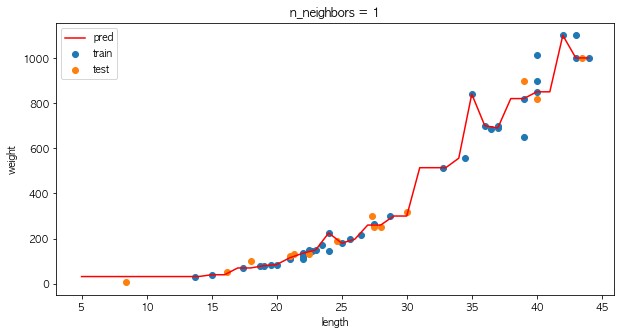

K = 3
Train : 0.9804899950518966
Test : 0.9746459963987609


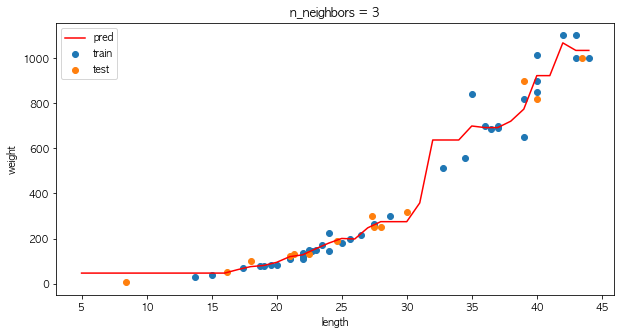

K = 5
Train : 0.9698823289099254
Test : 0.992809406101064


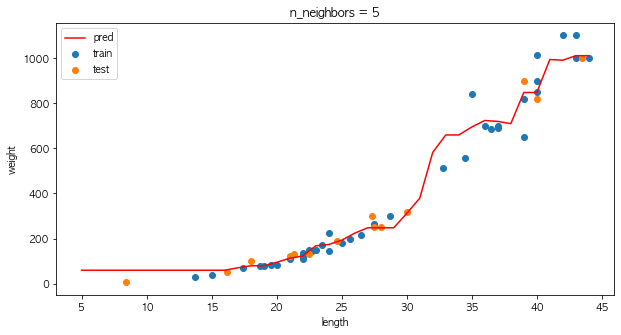

K = 10
Train : 0.96164569026043
Test : 0.9737908255822255


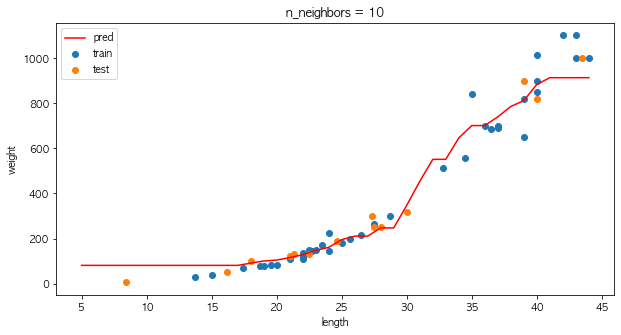

In [63]:
# n = 1, 3, 5, 10 일 때 예측 결과를 그래프로
for n in [1,3,5,10]:
    # 학습
    knr.n_neighbors = n
    knr.fit(train_input, train_label)
    print('K =', n)
    print('Train :',knr.score(train_input, train_label))
    print('Test :',knr.score(test_input, test_label))

    # 지정한 범위 x에 대한 예측 구하기
    pred = knr.predict(x)

    # 훈련셋와 검증셋의 예측결과 그래프로 
    plt.figure(figsize=(10,5))
    plt.plot(x, pred, color='red')
    plt.scatter(train_input, train_label)
    plt.scatter(test_input, test_label)

    plt.title('n_neighbors = %d'%n)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend(['pred', 'train','test'])

    plt.show()
    

In [53]:
print(x, pred)

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]] [ 81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5
  81.5  91.3 100.8 104.8 116.  128.5 148.  161.2 195.5 211.  211.  247.4
 247.4 347.5 453.5 551.  551.  645.5 700.5 700.5 739.1 785.  811.  882.5
 912.5 912.5 912.5 912.5]
